# SVM - UNSW

In [1]:
cd C:\\Users\\Sharuka Thirimanne\\Desktop\\FYP-ML-IDS

C:\Users\Sharuka Thirimanne\Desktop\FYP-ML-IDS


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, classification_report, confusion_matrix 

In [3]:
def load_train_dataset():
    df_train = pd.read_csv('USNW_train-set.csv')
    df_train = shuffle(df_train)
    limit1 = df_train.shape[1]-1
    
    X_train = df_train.iloc[:,0:limit1]
    Y_train = df_train.iloc[:,limit1]
    
    X_train.reset_index(inplace=True, drop=True)
    Y_train.reset_index(inplace=True, drop=True)
    
    return  X_train, Y_train,  df_train

X_train, Y_train,  df_train = load_train_dataset()

In [4]:
def load_test_dataset():
    df_test = pd.read_csv('USNW_test-set.csv')
    df_test = shuffle(df_test)
    limit2 = df_test.shape[1]-1
    
    X_test = df_test.iloc[:,0:limit2]
    Y_test = df_test.iloc[:,limit2]
    
    X_test.reset_index(inplace=True, drop=True)
    Y_test.reset_index(inplace=True, drop=True)
    
    return X_test, Y_test,df_test

X_test, Y_test ,df_test = load_test_dataset()

In [5]:
X_train, X_val , Y_train , Y_val = train_test_split(X_train,Y_train, test_size=0.2,stratify = Y_train,
                                                    shuffle=True,random_state=42)

print('Training X   :',X_train.shape)
print('Validation X :',X_val.shape)
print('Test_X       :',X_test.shape)
print('Training_Y   :',Y_train.shape)
print('Validation Y :',Y_val.shape)
print('Test_Y       :',Y_test.shape)

Training X   : (80836, 65)
Validation X : (20210, 65)
Test_X       : (53899, 65)
Training_Y   : (80836,)
Validation Y : (20210,)
Test_Y       : (53899,)


In [18]:
model = SVC(C= 19, gamma= 0.9).fit(X_train,Y_train)

In [19]:
model_poly = SVC(C= 2.5, kernel= 'poly',degree=4,gamma=0.6).fit(X_train,Y_train)

In [20]:
print('RBF Kernel')
test_predictions = model.predict(X_test)

print("Cross-Validation set accuracy: {:.6f} %".format((cross_val_score(model, X_val, Y_val, 
                                                                        cv=5,scoring='accuracy').mean())*100))
print("Train set accuracy           : {:.6f} %".format(model.score(X_train,Y_train)*100))
print("Test set accuracy            : {:.6f} %".format(accuracy_score(Y_test, test_predictions)*100))

RBF Kernel
Cross-Validation set accuracy: 90.252350 %
Train set accuracy           : 90.782572 %
Test set accuracy            : 75.739810 %


In [22]:
print("Test set precision : {:.4f}".format(precision_score(Y_test, test_predictions)))
print("Test set recall    : {:.4f}".format(recall_score(Y_test, test_predictions)))
print("Test set F1-score  : {:.4f}".format(f1_score(Y_test, test_predictions)))

Test set precision : 0.6034
Test set recall    : 0.9804
Test set F1-score  : 0.7470


In [23]:
print('Poly Kernel')
test_predictions_poly = model_poly.predict(X_test)

print("Cross-Validation set accuracy: {:.4f} %".format((cross_val_score(model_poly, X_val, Y_val, 
                                                                        cv=3,scoring='accuracy').mean())*100))
print("Train set accuracy           : {:.4f} %".format(model_poly.score(X_train,Y_train)*100))
print("Test set accuracy            : {:.4f} %".format(accuracy_score(Y_test, test_predictions_poly)*100))

Poly Kernel
Cross-Validation set accuracy: 90.2820 %
Train set accuracy           : 90.8444 %
Test set accuracy            : 75.8196 %


In [24]:
print("Test set precision : {:.4f}".format(precision_score(Y_test, test_predictions_poly)))
print("Test set recall    : {:.4f}".format(recall_score(Y_test, test_predictions_poly)))
print("Test set F1-score  : {:.4f}".format(f1_score(Y_test, test_predictions_poly)))

Test set precision : 0.6054
Test set recall    : 0.9717
Test set F1-score  : 0.7460


True Negatives  : 0.63
False Positives : 0.37
False Negatives : 0.02
True Positives  : 0.98


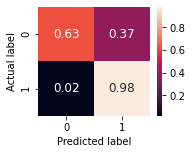

In [25]:
def plot_cm(labels, predictions):
    cm = confusion_matrix(labels, predictions , normalize= 'true')
    plt.figure(figsize=(2.5,2))
    sns.heatmap(cm, annot=True, fmt=".2f",annot_kws={'size':12})
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives  : {:.2f}'.format(cm[0][0]))
    print('False Positives : {:.2f}'.format(cm[0][1]))
    print('False Negatives : {:.2f}'.format(cm[1][0]))
    print('True Positives  : {:.2f}'.format(cm[1][1]))
    
plot_cm(Y_test,test_predictions)

True Negatives  : 0.64
False Positives : 0.36
False Negatives : 0.03
True Positives  : 0.97


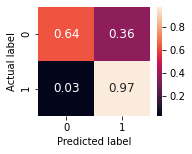

In [26]:
def plot_cm(labels, predictions):
    cm = confusion_matrix(labels, predictions, normalize= 'true')
    plt.figure(figsize=(2.5,2))
    sns.heatmap(cm, annot=True, fmt=".2f",annot_kws={'size':12})
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives  : {:.2f}'.format(cm[0][0]))
    print('False Positives : {:.2f}'.format(cm[0][1]))
    print('False Negatives : {:.2f}'.format(cm[1][0]))
    print('True Positives  : {:.2f}'.format(cm[1][1]))
    
plot_cm(Y_test,test_predictions_poly)

In [12]:
predictions = [test_predictions,test_predictions_poly]
kernel_names = ['RBF','Poly']

def plot_cm(labels, predictions,kernel_names, p=0.5):
    fig, axs = plt.subplots(nrows = 1,ncols = 2, figsize=(8, 3))
    for i in range(0,2): 
        pred = predictions[i]
        k_names = kernel_names[i]
        cm = confusion_matrix(labels, pred > p, normalize= 'true')
        sns.heatmap(cm, annot=True, fmt=".2f",ax=axs[i],annot_kws={'size':14})
        axs[i].set(xlabel='Predicted label',ylabel='Actual label',title=str('Confusion matrix @{:.2f}'.format(p))+' '+ str(k_names))
        
        print('True Negatives  : {:.2f}'.format(cm[0][0]))
        print('False Positives : {:.2f}'.format(cm[0][1]))
        print('False Negatives : {:.2f}'.format(cm[1][0]))
        print('True Positives  : {:.2f}'.format(cm[1][1]))

True Negatives  : 0.61
False Positives : 0.39
False Negatives : 0.01
True Positives  : 0.99
True Negatives  : 0.64
False Positives : 0.36
False Negatives : 0.03
True Positives  : 0.97


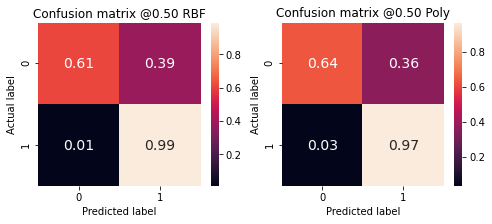

In [13]:
plot_cm(Y_test, predictions,kernel_names)

In [ ]:
print('RBF Kernel Classification Report')
print(classification_report(Y_test, test_predictions))
print('\n')
print('Poly Kernel Classification Report')
print(classification_report(Y_test, test_predictions_poly))

In [34]:
 model.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [16]:
param_grid = {'gamma' : np.arange(0.1,1,0.1).tolist(),
              'C' : np.arange(0.5,20.0,0.5).tolist()}

optimal_params = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    cv=2,
    scoring ='accuracy',
    verbose = 2
)

optimal_params.fit(X_val,Y_val)
print(optimal_params.best_params_)

Fitting 2 folds for each of 351 candidates, totalling 702 fits
[CV] C=0.5, gamma=0.1 ................................................
[LibSVM]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. C=0.5, gamma=0.1, total=   7.5s
[CV] C=0.5, gamma=0.1 ................................................
[LibSVM]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s


[CV] ................................. C=0.5, gamma=0.1, total=   6.8s
[CV] C=0.5, gamma=0.2 ................................................
[LibSVM][CV] ................................. C=0.5, gamma=0.2, total=   6.8s
[CV] C=0.5, gamma=0.2 ................................................
[LibSVM][CV] ................................. C=0.5, gamma=0.2, total=   6.4s
[CV] C=0.5, gamma=0.30000000000000004 ................................
[LibSVM][CV] ................. C=0.5, gamma=0.30000000000000004, total=   6.5s
[CV] C=0.5, gamma=0.30000000000000004 ................................
[LibSVM][CV] ................. C=0.5, gamma=0.30000000000000004, total=   6.5s
[CV] C=0.5, gamma=0.4 ................................................
[LibSVM][CV] ................................. C=0.5, gamma=0.4, total=   6.9s
[CV] C=0.5, gamma=0.4 ................................................
[LibSVM][CV] ................................. C=0.5, gamma=0.4, total=   7.1s
[CV] C=0.5, gamma=0.5 .......

[LibSVM][CV] ................................. C=2.0, gamma=0.2, total=   6.5s
[CV] C=2.0, gamma=0.2 ................................................
[LibSVM][CV] ................................. C=2.0, gamma=0.2, total=   6.3s
[CV] C=2.0, gamma=0.30000000000000004 ................................
[LibSVM][CV] ................. C=2.0, gamma=0.30000000000000004, total=   6.6s
[CV] C=2.0, gamma=0.30000000000000004 ................................
[LibSVM][CV] ................. C=2.0, gamma=0.30000000000000004, total=   6.7s
[CV] C=2.0, gamma=0.4 ................................................
[LibSVM][CV] ................................. C=2.0, gamma=0.4, total=   6.7s
[CV] C=2.0, gamma=0.4 ................................................
[LibSVM][CV] ................................. C=2.0, gamma=0.4, total=   7.6s
[CV] C=2.0, gamma=0.5 ................................................
[LibSVM][CV] ................................. C=2.0, gamma=0.5, total=   6.5s
[CV] C=2.0, gamma=0.5

[LibSVM][CV] ................................. C=3.5, gamma=0.2, total=   6.7s
[CV] C=3.5, gamma=0.30000000000000004 ................................
[LibSVM][CV] ................. C=3.5, gamma=0.30000000000000004, total=   6.6s
[CV] C=3.5, gamma=0.30000000000000004 ................................
[LibSVM][CV] ................. C=3.5, gamma=0.30000000000000004, total=   6.7s
[CV] C=3.5, gamma=0.4 ................................................
[LibSVM][CV] ................................. C=3.5, gamma=0.4, total=   7.4s
[CV] C=3.5, gamma=0.4 ................................................
[LibSVM][CV] ................................. C=3.5, gamma=0.4, total=   6.5s
[CV] C=3.5, gamma=0.5 ................................................
[LibSVM][CV] ................................. C=3.5, gamma=0.5, total=   6.7s
[CV] C=3.5, gamma=0.5 ................................................
[LibSVM][CV] ................................. C=3.5, gamma=0.5, total=   6.4s
[CV] C=3.5, gamma=0.6

[LibSVM][CV] ................. C=5.0, gamma=0.30000000000000004, total=   6.5s
[CV] C=5.0, gamma=0.30000000000000004 ................................
[LibSVM][CV] ................. C=5.0, gamma=0.30000000000000004, total=   8.0s
[CV] C=5.0, gamma=0.4 ................................................
[LibSVM][CV] ................................. C=5.0, gamma=0.4, total=   7.1s
[CV] C=5.0, gamma=0.4 ................................................
[LibSVM][CV] ................................. C=5.0, gamma=0.4, total=   6.7s
[CV] C=5.0, gamma=0.5 ................................................
[LibSVM][CV] ................................. C=5.0, gamma=0.5, total=   6.7s
[CV] C=5.0, gamma=0.5 ................................................
[LibSVM][CV] ................................. C=5.0, gamma=0.5, total=   6.9s
[CV] C=5.0, gamma=0.6 ................................................
[LibSVM][CV] ................................. C=5.0, gamma=0.6, total=   6.9s
[CV] C=5.0, gamma=0.6

[LibSVM][CV] ................. C=6.5, gamma=0.30000000000000004, total=   7.3s
[CV] C=6.5, gamma=0.4 ................................................
[LibSVM][CV] ................................. C=6.5, gamma=0.4, total=   7.4s
[CV] C=6.5, gamma=0.4 ................................................
[LibSVM][CV] ................................. C=6.5, gamma=0.4, total=   7.3s
[CV] C=6.5, gamma=0.5 ................................................
[LibSVM][CV] ................................. C=6.5, gamma=0.5, total=   7.6s
[CV] C=6.5, gamma=0.5 ................................................
[LibSVM][CV] ................................. C=6.5, gamma=0.5, total=   6.8s
[CV] C=6.5, gamma=0.6 ................................................
[LibSVM][CV] ................................. C=6.5, gamma=0.6, total=   7.1s
[CV] C=6.5, gamma=0.6 ................................................
[LibSVM][CV] ................................. C=6.5, gamma=0.6, total=   7.2s
[CV] C=6.5, gamma=0.7

[LibSVM][CV] ................................. C=8.0, gamma=0.4, total=   6.6s
[CV] C=8.0, gamma=0.4 ................................................
[LibSVM][CV] ................................. C=8.0, gamma=0.4, total=   7.4s
[CV] C=8.0, gamma=0.5 ................................................
[LibSVM][CV] ................................. C=8.0, gamma=0.5, total=   8.5s
[CV] C=8.0, gamma=0.5 ................................................
[LibSVM][CV] ................................. C=8.0, gamma=0.5, total=   7.5s
[CV] C=8.0, gamma=0.6 ................................................
[LibSVM][CV] ................................. C=8.0, gamma=0.6, total=   8.4s
[CV] C=8.0, gamma=0.6 ................................................
[LibSVM][CV] ................................. C=8.0, gamma=0.6, total=   8.6s
[CV] C=8.0, gamma=0.7000000000000001 .................................
[LibSVM][CV] .................. C=8.0, gamma=0.7000000000000001, total=   8.0s
[CV] C=8.0, gamma=0.7

[LibSVM][CV] ................................. C=9.5, gamma=0.4, total=   7.8s
[CV] C=9.5, gamma=0.5 ................................................
[LibSVM][CV] ................................. C=9.5, gamma=0.5, total=   7.5s
[CV] C=9.5, gamma=0.5 ................................................
[LibSVM][CV] ................................. C=9.5, gamma=0.5, total=   7.7s
[CV] C=9.5, gamma=0.6 ................................................
[LibSVM][CV] ................................. C=9.5, gamma=0.6, total=   7.3s
[CV] C=9.5, gamma=0.6 ................................................
[LibSVM][CV] ................................. C=9.5, gamma=0.6, total=   7.2s
[CV] C=9.5, gamma=0.7000000000000001 .................................
[LibSVM][CV] .................. C=9.5, gamma=0.7000000000000001, total=   7.5s
[CV] C=9.5, gamma=0.7000000000000001 .................................
[LibSVM][CV] .................. C=9.5, gamma=0.7000000000000001, total=   6.8s
[CV] C=9.5, gamma=0.8

[LibSVM][CV] ................................ C=11.0, gamma=0.5, total=   6.5s
[CV] C=11.0, gamma=0.5 ...............................................
[LibSVM][CV] ................................ C=11.0, gamma=0.5, total=   6.5s
[CV] C=11.0, gamma=0.6 ...............................................
[LibSVM][CV] ................................ C=11.0, gamma=0.6, total=   6.6s
[CV] C=11.0, gamma=0.6 ...............................................
[LibSVM][CV] ................................ C=11.0, gamma=0.6, total=   6.9s
[CV] C=11.0, gamma=0.7000000000000001 ................................
[LibSVM][CV] ................. C=11.0, gamma=0.7000000000000001, total=   7.6s
[CV] C=11.0, gamma=0.7000000000000001 ................................
[LibSVM][CV] ................. C=11.0, gamma=0.7000000000000001, total=   6.5s
[CV] C=11.0, gamma=0.8 ...............................................
[LibSVM][CV] ................................ C=11.0, gamma=0.8, total=   7.0s
[CV] C=11.0, gamma=0.

[LibSVM][CV] ................................ C=12.5, gamma=0.5, total=   6.9s
[CV] C=12.5, gamma=0.6 ...............................................
[LibSVM][CV] ................................ C=12.5, gamma=0.6, total=   7.6s
[CV] C=12.5, gamma=0.6 ...............................................
[LibSVM][CV] ................................ C=12.5, gamma=0.6, total=   6.7s
[CV] C=12.5, gamma=0.7000000000000001 ................................
[LibSVM][CV] ................. C=12.5, gamma=0.7000000000000001, total=   7.1s
[CV] C=12.5, gamma=0.7000000000000001 ................................
[LibSVM][CV] ................. C=12.5, gamma=0.7000000000000001, total=   6.7s
[CV] C=12.5, gamma=0.8 ...............................................
[LibSVM][CV] ................................ C=12.5, gamma=0.8, total=   7.6s
[CV] C=12.5, gamma=0.8 ...............................................
[LibSVM][CV] ................................ C=12.5, gamma=0.8, total=   8.0s
[CV] C=12.5, gamma=0.

[LibSVM][CV] ................................ C=14.0, gamma=0.6, total=   8.9s
[CV] C=14.0, gamma=0.6 ...............................................
[LibSVM][CV] ................................ C=14.0, gamma=0.6, total=   8.2s
[CV] C=14.0, gamma=0.7000000000000001 ................................
[LibSVM][CV] ................. C=14.0, gamma=0.7000000000000001, total=   7.6s
[CV] C=14.0, gamma=0.7000000000000001 ................................
[LibSVM][CV] ................. C=14.0, gamma=0.7000000000000001, total=   7.1s
[CV] C=14.0, gamma=0.8 ...............................................
[LibSVM][CV] ................................ C=14.0, gamma=0.8, total=   8.2s
[CV] C=14.0, gamma=0.8 ...............................................
[LibSVM][CV] ................................ C=14.0, gamma=0.8, total=   7.3s
[CV] C=14.0, gamma=0.9 ...............................................
[LibSVM][CV] ................................ C=14.0, gamma=0.9, total=   7.5s
[CV] C=14.0, gamma=0.

[LibSVM][CV] ................................ C=15.5, gamma=0.6, total=   6.4s
[CV] C=15.5, gamma=0.7000000000000001 ................................
[LibSVM][CV] ................. C=15.5, gamma=0.7000000000000001, total=   6.8s
[CV] C=15.5, gamma=0.7000000000000001 ................................
[LibSVM][CV] ................. C=15.5, gamma=0.7000000000000001, total=   6.9s
[CV] C=15.5, gamma=0.8 ...............................................
[LibSVM][CV] ................................ C=15.5, gamma=0.8, total=   7.0s
[CV] C=15.5, gamma=0.8 ...............................................
[LibSVM][CV] ................................ C=15.5, gamma=0.8, total=   6.7s
[CV] C=15.5, gamma=0.9 ...............................................
[LibSVM][CV] ................................ C=15.5, gamma=0.9, total=   7.0s
[CV] C=15.5, gamma=0.9 ...............................................
[LibSVM][CV] ................................ C=15.5, gamma=0.9, total=   6.9s
[CV] C=16.0, gamma=0.

[LibSVM][CV] ................. C=17.0, gamma=0.7000000000000001, total=   7.0s
[CV] C=17.0, gamma=0.7000000000000001 ................................
[LibSVM][CV] ................. C=17.0, gamma=0.7000000000000001, total=   7.0s
[CV] C=17.0, gamma=0.8 ...............................................
[LibSVM][CV] ................................ C=17.0, gamma=0.8, total=   7.5s
[CV] C=17.0, gamma=0.8 ...............................................
[LibSVM][CV] ................................ C=17.0, gamma=0.8, total=   7.3s
[CV] C=17.0, gamma=0.9 ...............................................
[LibSVM][CV] ................................ C=17.0, gamma=0.9, total=   7.2s
[CV] C=17.0, gamma=0.9 ...............................................
[LibSVM][CV] ................................ C=17.0, gamma=0.9, total=   8.6s
[CV] C=17.5, gamma=0.1 ...............................................
[LibSVM][CV] ................................ C=17.5, gamma=0.1, total=   7.2s
[CV] C=17.5, gamma=0.

[LibSVM][CV] ................. C=18.5, gamma=0.7000000000000001, total=   7.1s
[CV] C=18.5, gamma=0.8 ...............................................
[LibSVM][CV] ................................ C=18.5, gamma=0.8, total=   7.2s
[CV] C=18.5, gamma=0.8 ...............................................
[LibSVM][CV] ................................ C=18.5, gamma=0.8, total=   6.9s
[CV] C=18.5, gamma=0.9 ...............................................
[LibSVM][CV] ................................ C=18.5, gamma=0.9, total=   7.4s
[CV] C=18.5, gamma=0.9 ...............................................
[LibSVM][CV] ................................ C=18.5, gamma=0.9, total=   7.4s
[CV] C=19.0, gamma=0.1 ...............................................
[LibSVM][CV] ................................ C=19.0, gamma=0.1, total=   6.9s
[CV] C=19.0, gamma=0.1 ...............................................
[LibSVM][CV] ................................ C=19.0, gamma=0.1, total=   7.0s
[CV] C=19.0, gamma=0.

[Parallel(n_jobs=1)]: Done 702 out of 702 | elapsed: 83.4min finished


[LibSVM]{'C': 19.0, 'gamma': 0.9}


In [17]:
param_grid = {'gamma' : np.arange(0.1,1,0.1).tolist(),
              'C' : np.arange(0.5,20.0,0.5).tolist()}

optimal_params = GridSearchCV(
    estimator = model_poly,
    param_grid = param_grid,
    scoring ='accuracy',
    cv=2,
    verbose = 2
)

optimal_params.fit(X_val,Y_val)
print(optimal_params.best_params_)

Fitting 2 folds for each of 351 candidates, totalling 702 fits
[CV] C=0.5, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. C=0.5, gamma=0.1, total=   8.1s
[CV] C=0.5, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV] ................................. C=0.5, gamma=0.1, total=   8.7s
[CV] C=0.5, gamma=0.2 ................................................
[CV] ................................. C=0.5, gamma=0.2, total=   5.7s
[CV] C=0.5, gamma=0.2 ................................................
[CV] ................................. C=0.5, gamma=0.2, total=   5.6s
[CV] C=0.5, gamma=0.30000000000000004 ................................
[CV] ................. C=0.5, gamma=0.30000000000000004, total=   5.5s
[CV] C=0.5, gamma=0.30000000000000004 ................................
[CV] ................. C=0.5, gamma=0.30000000000000004, total=   5.8s
[CV] C=0.5, gamma=0.4 ................................................
[CV] ................................. C=0.5, gamma=0.4, total=   6.0s
[CV] C=0.5, gamma=0.4 ................................................
[CV] ................................. C=0.5, gamma=0.4, total=   6.0s
[CV] C=0.5, gamma=0.5 ................................................
[CV] .

[CV] ................. C=2.0, gamma=0.30000000000000004, total=   5.8s
[CV] C=2.0, gamma=0.4 ................................................
[CV] ................................. C=2.0, gamma=0.4, total=   6.4s
[CV] C=2.0, gamma=0.4 ................................................
[CV] ................................. C=2.0, gamma=0.4, total=   6.5s
[CV] C=2.0, gamma=0.5 ................................................
[CV] ................................. C=2.0, gamma=0.5, total=   7.1s
[CV] C=2.0, gamma=0.5 ................................................
[CV] ................................. C=2.0, gamma=0.5, total=   6.8s
[CV] C=2.0, gamma=0.6 ................................................
[CV] ................................. C=2.0, gamma=0.6, total=   9.2s
[CV] C=2.0, gamma=0.6 ................................................
[CV] ................................. C=2.0, gamma=0.6, total=   9.3s
[CV] C=2.0, gamma=0.7000000000000001 .................................
[CV] .

[CV] ................................. C=3.5, gamma=0.5, total=   8.3s
[CV] C=3.5, gamma=0.6 ................................................
[CV] ................................. C=3.5, gamma=0.6, total=  10.5s
[CV] C=3.5, gamma=0.6 ................................................
[CV] ................................. C=3.5, gamma=0.6, total=   9.5s
[CV] C=3.5, gamma=0.7000000000000001 .................................
[CV] .................. C=3.5, gamma=0.7000000000000001, total=  11.9s
[CV] C=3.5, gamma=0.7000000000000001 .................................
[CV] .................. C=3.5, gamma=0.7000000000000001, total=  11.2s
[CV] C=3.5, gamma=0.8 ................................................
[CV] ................................. C=3.5, gamma=0.8, total=  15.6s
[CV] C=3.5, gamma=0.8 ................................................
[CV] ................................. C=3.5, gamma=0.8, total=  14.0s
[CV] C=3.5, gamma=0.9 ................................................
[CV] .

[CV] .................. C=5.0, gamma=0.7000000000000001, total=  12.6s
[CV] C=5.0, gamma=0.8 ................................................
[CV] ................................. C=5.0, gamma=0.8, total=  19.0s
[CV] C=5.0, gamma=0.8 ................................................
[CV] ................................. C=5.0, gamma=0.8, total=  18.7s
[CV] C=5.0, gamma=0.9 ................................................
[CV] ................................. C=5.0, gamma=0.9, total=  20.9s
[CV] C=5.0, gamma=0.9 ................................................
[CV] ................................. C=5.0, gamma=0.9, total=  21.3s
[CV] C=5.5, gamma=0.1 ................................................
[CV] ................................. C=5.5, gamma=0.1, total=   5.5s
[CV] C=5.5, gamma=0.1 ................................................
[CV] ................................. C=5.5, gamma=0.1, total=   5.5s
[CV] C=5.5, gamma=0.2 ................................................
[CV] .

[CV] ................................. C=6.5, gamma=0.9, total=  24.1s
[CV] C=7.0, gamma=0.1 ................................................
[CV] ................................. C=7.0, gamma=0.1, total=   5.6s
[CV] C=7.0, gamma=0.1 ................................................
[CV] ................................. C=7.0, gamma=0.1, total=   6.9s
[CV] C=7.0, gamma=0.2 ................................................
[CV] ................................. C=7.0, gamma=0.2, total=   6.6s
[CV] C=7.0, gamma=0.2 ................................................
[CV] ................................. C=7.0, gamma=0.2, total=   5.7s
[CV] C=7.0, gamma=0.30000000000000004 ................................
[CV] ................. C=7.0, gamma=0.30000000000000004, total=   6.3s
[CV] C=7.0, gamma=0.30000000000000004 ................................
[CV] ................. C=7.0, gamma=0.30000000000000004, total=   6.3s
[CV] C=7.0, gamma=0.4 ................................................
[CV] .

[CV] ................................. C=8.5, gamma=0.2, total=   9.8s
[CV] C=8.5, gamma=0.30000000000000004 ................................
[CV] ................. C=8.5, gamma=0.30000000000000004, total=   6.3s
[CV] C=8.5, gamma=0.30000000000000004 ................................
[CV] ................. C=8.5, gamma=0.30000000000000004, total=   5.5s
[CV] C=8.5, gamma=0.4 ................................................
[CV] ................................. C=8.5, gamma=0.4, total=   7.9s
[CV] C=8.5, gamma=0.4 ................................................
[CV] ................................. C=8.5, gamma=0.4, total=   6.9s
[CV] C=8.5, gamma=0.5 ................................................
[CV] ................................. C=8.5, gamma=0.5, total=   9.8s
[CV] C=8.5, gamma=0.5 ................................................
[CV] ................................. C=8.5, gamma=0.5, total=   9.2s
[CV] C=8.5, gamma=0.6 ................................................
[CV] .

[CV] ................................ C=10.0, gamma=0.4, total=   7.3s
[CV] C=10.0, gamma=0.5 ...............................................
[CV] ................................ C=10.0, gamma=0.5, total=  10.7s
[CV] C=10.0, gamma=0.5 ...............................................
[CV] ................................ C=10.0, gamma=0.5, total=   9.2s
[CV] C=10.0, gamma=0.6 ...............................................
[CV] ................................ C=10.0, gamma=0.6, total=  14.3s
[CV] C=10.0, gamma=0.6 ...............................................
[CV] ................................ C=10.0, gamma=0.6, total=  12.3s
[CV] C=10.0, gamma=0.7000000000000001 ................................
[CV] ................. C=10.0, gamma=0.7000000000000001, total=  18.3s
[CV] C=10.0, gamma=0.7000000000000001 ................................
[CV] ................. C=10.0, gamma=0.7000000000000001, total=  18.5s
[CV] C=10.0, gamma=0.8 ...............................................
[CV] .

[CV] ................................ C=11.5, gamma=0.6, total=  15.1s
[CV] C=11.5, gamma=0.7000000000000001 ................................
[CV] ................. C=11.5, gamma=0.7000000000000001, total=  20.7s
[CV] C=11.5, gamma=0.7000000000000001 ................................
[CV] ................. C=11.5, gamma=0.7000000000000001, total=  19.7s
[CV] C=11.5, gamma=0.8 ...............................................
[CV] ................................ C=11.5, gamma=0.8, total=  26.6s
[CV] C=11.5, gamma=0.8 ...............................................
[CV] ................................ C=11.5, gamma=0.8, total=  30.7s
[CV] C=11.5, gamma=0.9 ...............................................
[CV] ................................ C=11.5, gamma=0.9, total=  42.1s
[CV] C=11.5, gamma=0.9 ...............................................
[CV] ................................ C=11.5, gamma=0.9, total=  43.6s
[CV] C=12.0, gamma=0.1 ...............................................
[CV] .

[CV] ................................ C=13.0, gamma=0.8, total=  35.0s
[CV] C=13.0, gamma=0.9 ...............................................
[CV] ................................ C=13.0, gamma=0.9, total=  49.4s
[CV] C=13.0, gamma=0.9 ...............................................
[CV] ................................ C=13.0, gamma=0.9, total=  42.7s
[CV] C=13.5, gamma=0.1 ...............................................
[CV] ................................ C=13.5, gamma=0.1, total=   5.8s
[CV] C=13.5, gamma=0.1 ...............................................
[CV] ................................ C=13.5, gamma=0.1, total=   4.9s
[CV] C=13.5, gamma=0.2 ...............................................
[CV] ................................ C=13.5, gamma=0.2, total=   5.1s
[CV] C=13.5, gamma=0.2 ...............................................
[CV] ................................ C=13.5, gamma=0.2, total=   5.6s
[CV] C=13.5, gamma=0.30000000000000004 ...............................
[CV] .

[CV] ................................ C=15.0, gamma=0.1, total=   5.0s
[CV] C=15.0, gamma=0.2 ...............................................
[CV] ................................ C=15.0, gamma=0.2, total=   6.2s
[CV] C=15.0, gamma=0.2 ...............................................
[CV] ................................ C=15.0, gamma=0.2, total=   6.1s
[CV] C=15.0, gamma=0.30000000000000004 ...............................
[CV] ................ C=15.0, gamma=0.30000000000000004, total=   6.3s
[CV] C=15.0, gamma=0.30000000000000004 ...............................
[CV] ................ C=15.0, gamma=0.30000000000000004, total=   6.1s
[CV] C=15.0, gamma=0.4 ...............................................
[CV] ................................ C=15.0, gamma=0.4, total=   8.3s
[CV] C=15.0, gamma=0.4 ...............................................
[CV] ................................ C=15.0, gamma=0.4, total=   8.0s
[CV] C=15.0, gamma=0.5 ...............................................
[CV] .

[CV] ................ C=16.5, gamma=0.30000000000000004, total=   6.1s
[CV] C=16.5, gamma=0.4 ...............................................
[CV] ................................ C=16.5, gamma=0.4, total=   9.3s
[CV] C=16.5, gamma=0.4 ...............................................
[CV] ................................ C=16.5, gamma=0.4, total=   8.2s
[CV] C=16.5, gamma=0.5 ...............................................
[CV] ................................ C=16.5, gamma=0.5, total=  12.4s
[CV] C=16.5, gamma=0.5 ...............................................
[CV] ................................ C=16.5, gamma=0.5, total=  11.5s
[CV] C=16.5, gamma=0.6 ...............................................
[CV] ................................ C=16.5, gamma=0.6, total=  17.8s
[CV] C=16.5, gamma=0.6 ...............................................
[CV] ................................ C=16.5, gamma=0.6, total=  18.3s
[CV] C=16.5, gamma=0.7000000000000001 ................................
[CV] .

[CV] ................................ C=18.0, gamma=0.5, total=  11.9s
[CV] C=18.0, gamma=0.6 ...............................................
[CV] ................................ C=18.0, gamma=0.6, total=  18.2s
[CV] C=18.0, gamma=0.6 ...............................................
[CV] ................................ C=18.0, gamma=0.6, total=  18.0s
[CV] C=18.0, gamma=0.7000000000000001 ................................
[CV] ................. C=18.0, gamma=0.7000000000000001, total=  24.9s
[CV] C=18.0, gamma=0.7000000000000001 ................................
[CV] ................. C=18.0, gamma=0.7000000000000001, total=  25.6s
[CV] C=18.0, gamma=0.8 ...............................................
[CV] ................................ C=18.0, gamma=0.8, total=  35.3s
[CV] C=18.0, gamma=0.8 ...............................................
[CV] ................................ C=18.0, gamma=0.8, total=  35.2s
[CV] C=18.0, gamma=0.9 ...............................................
[CV] .

[CV] ................. C=19.5, gamma=0.7000000000000001, total=  25.0s
[CV] C=19.5, gamma=0.8 ...............................................
[CV] ................................ C=19.5, gamma=0.8, total=  35.7s
[CV] C=19.5, gamma=0.8 ...............................................
[CV] ................................ C=19.5, gamma=0.8, total=  36.9s
[CV] C=19.5, gamma=0.9 ...............................................
[CV] ................................ C=19.5, gamma=0.9, total=  53.7s
[CV] C=19.5, gamma=0.9 ...............................................
[CV] ................................ C=19.5, gamma=0.9, total=  52.6s


[Parallel(n_jobs=1)]: Done 702 out of 702 | elapsed: 164.8min finished


{'C': 2.5, 'gamma': 0.6}


c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


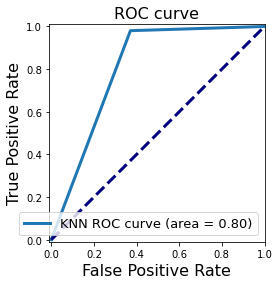

In [27]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, test_predictions)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='KNN ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


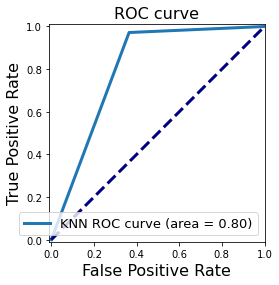

In [28]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, test_predictions_poly)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='KNN ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()